<a href="https://colab.research.google.com/github/btg1631/study_data_analytics/blob/main/docs/quests/EDAs/EDA_ShoppingMallDeliveryWithDate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 한글 폰트 설치
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 설치 후 colab 경우 Runtime > Restart session 필요

In [11]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용

In [2]:
import pandas as pd
import numpy as np

df_SMDWD = pd.read_csv('ShoppingMallDeliveryWithDate.csv')
df_SMDWD[:2]

,결제수단,배송번호,배송시작일,배송완료일,상품구매금액,상품번호,수량,주문경로,주문일
0,무통장입금,D-20181227-0000648-00,2019-01-07 오전 8:56,2019-01-11 오전 5:32,71450,1077.0,1,PC쇼핑몰,20181227
1,무통장입금,D-20181229-0000119-00,2019-01-03 오전 9:30,2019-01-07 오전 5:32,141240,42.0,2,모바일웹,20181229


In [3]:
df_SMDWD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46749 entries, 0 to 46748
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   결제수단    46749 non-null  object 
 1   배송번호    46749 non-null  object 
 2   배송시작일   46749 non-null  object 
 3   배송완료일   46749 non-null  object 
 4   상품구매금액  46749 non-null  int64  
 5   상품번호    46661 non-null  float64
 6   수량      46749 non-null  int64  
 7   주문경로    46749 non-null  object 
 8   주문일     46749 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 3.2+ MB


### 연속형을 범주형 전환

In [4]:
df_SMDWD['주문일'].sort_values()

45119    20170101
45120    20170115
45121    20170118
45122    20170123
45123    20170202
           ...   
17543    20190602
17542    20190602
17545    20190604
17548    20190619
17547    20190619
Name: 주문일, Length: 46749, dtype: int64

In [5]:
# 상반기 하반기로 나눠보았습니다..

bins = [20170101, 20170630, 20171231, 20180630, 20181231, 20190630, 20191231]
labels = ['2017_first', '2017_second', '2018_first', '2018_second', '2019_first', '2019_second']
df_SMDWD['주문일_category'] = pd.cut(x=df_SMDWD['주문일'], bins=bins, labels=labels)
df_SMDWD['주문일_category'].value_counts()

2018_second    19899
2019_first     17516
2018_first      7700
2017_second     1215
2017_first       418
2019_second        0
Name: 주문일_category, dtype: int64

### 기술 데이터 분석(DDA)

- 제안 8: 주문량 변동성 분석 및 예측
 + 문제 정의: 주문량의 시간별, 일별, 월별 변동성을 분석하고, 미래의 주문량을 예측합니다.
 + 배경: 주문량의 변동성을 이해하고 예측함으로써, 인력 및 자원 배치를 최적화하고 재고 관리 효율성을 향상시킬 수 있습니다


In [6]:
# 날짜별 주문량
df_SMDWD['주문일_datetime'] = pd.to_datetime(df_SMDWD['주문일'], format='%Y%m%d')

order_quantity = df_SMDWD['주문일_datetime'].value_counts()
order_quantity

2019-01-28    334
2018-12-26    255
2019-04-03    251
2018-10-23    248
2018-11-08    248
             ... 
2017-06-26      1
2017-06-23      1
2017-02-26      1
2019-06-04      1
2017-03-12      1
Name: 주문일_datetime, Length: 807, dtype: int64

In [7]:
df_SMDWD['주문일_datetime_year'] = df_SMDWD['주문일_datetime'].dt.year
df_SMDWD['주문일_datetime_month'] = df_SMDWD['주문일_datetime'].dt.month
df_SMDWD['주문일_datetime_day'] = df_SMDWD['주문일_datetime'].dt.day
df_SMDWD[:2]

,결제수단,배송번호,배송시작일,배송완료일,상품구매금액,상품번호,수량,주문경로,주문일,주문일_category,주문일_datetime,주문일_datetime_year,주문일_datetime_month,주문일_datetime_day
0,무통장입금,D-20181227-0000648-00,2019-01-07 오전 8:56,2019-01-11 오전 5:32,71450,1077.0,1,PC쇼핑몰,20181227,2018_second,2018-12-27,2018,12,27
1,무통장입금,D-20181229-0000119-00,2019-01-03 오전 9:30,2019-01-07 오전 5:32,141240,42.0,2,모바일웹,20181229,2018_second,2018-12-29,2018,12,29


In [24]:
# 년도별 주문량
order_quantity_year = df_SMDWD['주문일_datetime_year'].value_counts()
order_quantity_year

# 2017년도에 가장 적게, 2018년도에 가장 많이 팔렸다.
# 2017년도에 오픈한 쇼핑몰인가보다!
# 데이터가 20190619 까지만 있기 때문에 2018년 상반기에 7700을 판 것에 비해 2019년 상반기에는 17516으로
# 약 2.2758배 더 잘팔았으므로 2019년 하반기까지 합하면 2018년보다 2019년도에 더 많이 팔 것으로 예상됨

2018    27599
2019    17516
2017     1634
Name: 주문일_datetime_year, dtype: int64

In [21]:
# 월별 주문량
order_quantity_month = df_SMDWD['주문일_datetime_month'].value_counts()
order_quantity_month

# 주로 3~5월인 봄에 많이 팔렸다.
# 그 다음으로는 11~1월인 겨울에 많이 팔렸다.

5     5838
4     5355
3     4517
12    4372
11    4263
1     4205
10    3871
2     3547
8     3234
7     2858
9     2516
6     2173
Name: 주문일_datetime_month, dtype: int64

In [22]:
# 일별 주문량
order_quantity_day = df_SMDWD['주문일_datetime_day'].value_counts()
order_quantity_day

# 27, 28일에 많이 팔렷다... 왤까 월급날인가

28    1754
27    1714
7     1701
13    1691
23    1676
14    1669
8     1661
17    1649
18    1605
10    1579
26    1577
11    1566
19    1563
30    1545
12    1540
15    1536
4     1515
29    1511
20    1510
5     1502
21    1489
2     1472
3     1448
25    1427
22    1425
16    1384
9     1374
24    1365
6     1308
1     1190
31     803
Name: 주문일_datetime_day, dtype: int64

In [12]:
df_SMDWD['상품번호'].value_counts()

455.0     1700
1237.0    1577
1374.0    1486
1209.0    1457
1373.0    1453
          ... 
1504.0       1
1208.0       1
1241.0       1
1461.0       1
333.0        1
Name: 상품번호, Length: 648, dtype: int64

In [14]:
# 월별 팔린 상품과 상품 개수
df_grouped = df_SMDWD.groupby('주문일_datetime_month')['상품번호'].value_counts().reset_index(name='팔린 개수')
df_grouped

,주문일_datetime_month,상품번호,팔린 개수
0,1,1374.0,251
1,1,1373.0,238
2,1,455.0,181
3,1,608.0,155
4,1,1077.0,150
...,...,...,...
3490,12,1359.0,1
3491,12,1372.0,1
3492,12,1379.0,1
3493,12,1392.0,1


### EDA

Text(0.5, 1.0, '월별 상품 주문량')

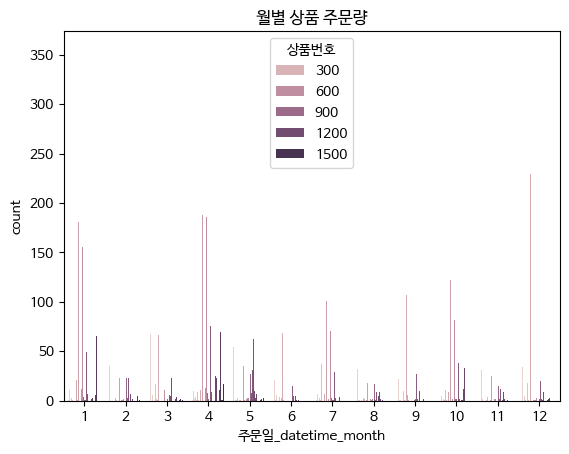

In [26]:
sns.countplot(data=df_SMDWD, x='주문일_datetime_month', hue='상품번호')
plt.title('월별 상품 주문량')
plt.show()